In [1]:
import warnings
warnings.filterwarnings('ignore') 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier




In [2]:
X_train=pd.read_csv("C:\\Users\\Asus\\GST\\Train_60\\Train_60\\Train_60\\X_Train_Data_Input.csv")
Y_train=pd.read_csv("C:\\Users\\Asus\\GST\\Train_60\\Train_60\\Train_60\\Y_Train_Data_Target.csv")
X_test=pd.read_csv("C:\\Users\\Asus\\GST\\Test_20\\Test_20\\Test_20\\X_Test_Data_Input.csv")
Y_test=pd.read_csv("C:\\Users\\Asus\\GST\\Test_20\\Test_20\\Test_20\\Y_Test_Data_Target.csv")

In [3]:
test_df1 = pd.concat([X_train, Y_train])


test_df1.to_csv('merged_rows.csv', index=False)

In [4]:
test_df1

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
0,ad1a67e4cbddc767a3456b0d94299b9e,2.0,2495.0,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,...,0.0,0.001351,0.00339,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,7246d2f76ac0c217ec25e72ea5f014cb,0.0,2495.0,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,...,0.0,0.001351,0.00339,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,22ba388e7dd14c13342c49e75fc29dda,2.0,2495.0,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,1.0,0.001351,0.00339,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,59f9b981472d97342587fb3e6392aeb1,0.0,211.0,59.0,NaN,NaN,NaN,-0.407939,-0.015607,-0.774979,...,0.0,NaN,0.00339,0.0,0.0,1.0,0.0,0.0,0.0,NaN
4,f6317cf7ecf126859804eddff279aead,0.0,718.0,950.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,...,0.0,NaN,0.00339,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785128,01b7d7be203dbf2a3d75c9770d68dfb6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
785129,c7993f2c4c15f46f366f6daaa747197d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
785130,a34b544f113a6d3b4eb353909a378afb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
785131,fe5b1826c9e7c1864886b233402df330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [5]:
test_df1.isnull().sum()

ID                0
Column0      785142
Column1      785133
Column2      785133
Column3      911436
Column4      912843
Column5      952313
Column6      788983
Column7      785133
Column8      788983
Column9     1517270
Column10     785133
Column11     785133
Column12     785133
Column13     785133
Column14    1150836
Column15     801589
Column16     785133
Column17     785133
Column18     785133
Column19     785133
Column20     785133
Column21     785133
target       785133
dtype: int64

In [54]:
test_df1['Column0'].fillna(test_df1['Column0'].median(), inplace=True)
test_df1['Column2'].fillna(test_df1['Column2'].median(), inplace=True)
test_df1['Column1'].fillna(test_df1['Column1'].median(), inplace=True)
test_df1['Column7'].fillna(test_df1['Column7'].median(), inplace=True)
test_df1['Column10'].fillna(test_df1['Column10'].median(), inplace=True)
test_df1['Column11'].fillna(test_df1['Column11'].median(), inplace=True)
test_df1['Column12'].fillna(test_df1['Column12'].median(), inplace=True)
test_df1['Column13'].fillna(test_df1['Column13'].median(), inplace=True)
test_df1['Column16'].fillna(test_df1['Column16'].median(), inplace=True)
test_df1['Column17'].fillna(test_df1['Column17'].median(), inplace=True)
test_df1['Column20'].fillna(test_df1['Column20'].median(), inplace=True)
test_df1['Column18'].fillna(test_df1['Column18'].median(), inplace=True)
test_df1['Column19'].fillna(test_df1['Column19'].median(), inplace=True)
test_df1['Column21'].fillna(test_df1['Column21'].median(), inplace=True)
test_df1['target'].fillna(test_df1['target'].median(0), inplace=True)

test_df1['Column3'].fillna(test_df1['Column3'].median(), inplace=True)
test_df1['Column4'].fillna(test_df1['Column4'].median(), inplace=True)
test_df1['Column5'].fillna(test_df1['Column5'].median(), inplace=True)
test_df1['Column6'].fillna(test_df1['Column6'].median(), inplace=True)
test_df1['Column8'].fillna(test_df1['Column8'].median(), inplace=True)
test_df1['Column9'].fillna(test_df1['Column9'].median(), inplace=True)
test_df1['Column14'].fillna(test_df1['Column14'].median(), inplace=True)
test_df1['Column15'].fillna(test_df1['Column15'].median(), inplace=True)


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X=test_df1.drop(['target'],axis=1)
y=test_df1['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
511058,f6e54c25021fb27a20f96da0005e49ff,0.0,1078.0,2811.0,-2.028572,-1.855728,-0.007469,-0.407939,-0.015607,-0.774979,...,0.0,0.0,0.001351,0.003390,0.0,0.0,0.0,0.0,0.0,0.0
337288,565dd6c5cff6f326da11527ed3987b5f,0.0,1173.0,2709.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.122085,...,0.0,0.0,0.001351,0.003390,0.0,0.0,0.0,0.0,0.0,0.0
654369,1f2b51eccd4504ed6ba8ad648aee354b,0.0,1173.0,2709.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.122085,...,0.0,0.0,0.001351,0.003390,0.0,0.0,0.0,0.0,0.0,0.0
620398,c7387fc9b7317e6fadea6133282fac07,0.0,2495.0,3694.0,0.678139,0.701403,-0.007468,-0.208893,-0.015602,0.545729,...,0.0,0.0,0.001351,0.003390,0.0,0.0,0.0,0.0,0.0,0.0
61664,68caffe9a9946ce2e0635876e7e00c4d,0.0,2495.0,3246.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.0,0.0,0.001351,0.003390,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,1a809411facdf0cc58b70e09a06cb1ee,0.0,1146.0,2784.0,-0.675216,0.062121,-0.007469,-0.407939,-0.015607,2.073435,...,1.0,1.0,0.001351,0.003390,0.0,0.0,0.0,0.0,0.0,0.0
629281,8cce536bed9523fc31c9a918f95b8d55,0.0,1173.0,2709.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.122085,...,0.0,0.0,0.001351,0.003390,0.0,0.0,0.0,0.0,0.0,0.0
131932,6499656fdc646cc7e7c87b7ad01c5970,0.0,158.0,3976.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.0,0.0,0.001351,0.003390,0.0,0.0,0.0,0.0,0.0,0.0
671155,85d4da8eabd74a76006f6313eae0332f,0.0,2495.0,4328.0,-0.675216,0.701403,-0.007468,-0.407939,-0.015607,0.720047,...,1.0,0.0,0.001351,0.003391,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X_train.isnull().sum()

ID          0
Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column9     0
Column10    0
Column11    0
Column12    0
Column13    0
Column14    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
dtype: int64

In [11]:
X_train.describe()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
count,1.256212e+06,1.256212e+06,1.256212e+06,1.256212e+06,1.256212e+06,1.256212e+06,1.256212e+06,1.256212e+06,1.256212e+06,1.256212e+06,...,1.256212e+06,1.256212e+06,1.256212e+06,1.256212e+06,1.256212e+06,1.256212e+06,1.256212e+06,1.256212e+06,1.256212e+06,1.256212e+06
mean,2.201595e-01,1.247473e+03,2.829494e+03,3.930345e-01,4.070361e-01,-4.576683e-03,-2.048149e-01,-7.254473e-03,6.158499e-02,-7.889030e-02,...,1.816270e-01,1.641331e-01,6.157853e-04,1.049354e-03,5.866844e-04,1.339217e-01,7.396124e-02,9.359885e-03,4.679943e-03,1.398649e-03
std,8.506599e-01,6.462114e+02,1.520638e+03,7.297553e-01,7.345984e-01,6.555810e-01,7.345623e-01,7.665021e-01,7.278413e-01,2.129111e-01,...,3.855370e-01,3.703965e-01,7.460847e-01,1.002246e+00,2.428013e-02,2.204171e+00,3.140403e-01,9.629271e-02,6.824987e-02,3.737237e-02
min,0.000000e+00,-1.080000e+03,-4.700000e+01,-2.028572e+00,-1.855728e+00,-7.468650e-03,-4.079391e-01,-1.560743e-02,-7.749792e-01,-8.855429e-02,...,0.000000e+00,0.000000e+00,-8.327496e+02,-1.091546e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.172000e+03,2.704000e+03,6.781394e-01,7.014035e-01,-7.468650e-03,-4.079391e-01,-1.560743e-02,1.220851e-01,-8.182017e-02,...,0.000000e+00,0.000000e+00,1.350606e-03,3.390099e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,1.173000e+03,2.709000e+03,6.781394e-01,7.014035e-01,-7.468650e-03,-4.079391e-01,-1.560743e-02,1.220851e-01,-8.182017e-02,...,0.000000e+00,0.000000e+00,1.350606e-03,3.390099e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.174000e+03,2.709000e+03,6.781394e-01,7.014035e-01,-7.468650e-03,-4.079391e-01,-1.560743e-02,1.220851e-01,-8.182017e-02,...,0.000000e+00,0.000000e+00,1.350606e-03,3.390099e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.800000e+01,2.499000e+03,1.029000e+04,6.781394e-01,7.014035e-01,5.514211e+02,1.498582e+01,2.016879e+02,3.239925e+02,1.339118e+02,...,1.000000e+00,1.000000e+00,8.514416e+00,1.273565e-02,2.000000e+00,7.280000e+02,1.200000e+01,1.000000e+00,1.000000e+00,1.000000e+00


In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1256212 entries, 511058 to 121958
Data columns (total 23 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   ID        1256212 non-null  object 
 1   Column0   1256212 non-null  float64
 2   Column1   1256212 non-null  float64
 3   Column2   1256212 non-null  float64
 4   Column3   1256212 non-null  float64
 5   Column4   1256212 non-null  float64
 6   Column5   1256212 non-null  float64
 7   Column6   1256212 non-null  float64
 8   Column7   1256212 non-null  float64
 9   Column8   1256212 non-null  float64
 10  Column9   1256212 non-null  float64
 11  Column10  1256212 non-null  float64
 12  Column11  1256212 non-null  float64
 13  Column12  1256212 non-null  float64
 14  Column13  1256212 non-null  float64
 15  Column14  1256212 non-null  float64
 16  Column15  1256212 non-null  float64
 17  Column16  1256212 non-null  float64
 18  Column17  1256212 non-null  float64
 19  Column18  1256212 non-

In [13]:
missing_percentage_per_column = X_train.isnull().mean() * 100

print(missing_percentage_per_column)

ID          0.0
Column0     0.0
Column1     0.0
Column2     0.0
Column3     0.0
Column4     0.0
Column5     0.0
Column6     0.0
Column7     0.0
Column8     0.0
Column9     0.0
Column10    0.0
Column11    0.0
Column12    0.0
Column13    0.0
Column14    0.0
Column15    0.0
Column16    0.0
Column17    0.0
Column18    0.0
Column19    0.0
Column20    0.0
Column21    0.0
dtype: float64


In [14]:
overall_missing_percentage = X_train.isnull().mean().mean() * 100
print("\nOverall Missing Percentage:")
print(overall_missing_percentage)


Overall Missing Percentage:
0.0


In [15]:
numeric_cols_xtrain = X_train.select_dtypes(include=['number']).columns
numeric_cols_xtest1 = X_test.select_dtypes(include=['number']).columns

In [16]:
X_train[numeric_cols_xtrain] = X_train[numeric_cols_xtrain]

X_test[numeric_cols_xtest1] = X_test[numeric_cols_xtest1]


In [17]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled_train = scaler.fit_transform(X_train[numeric_cols_xtrain])
X_scaled_test = scaler.fit_transform(X_test[numeric_cols_xtest1])


In [18]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [19]:

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_scaled_train, y_train)


RandomForestClassifier(random_state=42)

In [20]:

y_pred = rf_classifier.predict(X_scaled_test)


In [21]:

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print(classification_report(y_test, y_pred))


Accuracy: 95.29%
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98    299276
         1.0       0.00      0.00      0.00     14778

    accuracy                           0.95    314054
   macro avg       0.48      0.50      0.49    314054
weighted avg       0.91      0.95      0.93    314054



 X_test[numeric_cols_xtrain] = X_test[numeric_cols_xtrain]


In [23]:
test_df2 = pd.concat([Y_test, X_test])


test_df2.to_csv('merged_rows.csv', index=False)

In [24]:
test_df2

,ID,target,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,07cf2025382f6325b316e128b1b90999,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,eb972eb3a1f8d0d1a13f45e7c07d37d4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ee35e164b3ddc25a9f40243b81ad290d,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28229ccd7bad7dd83324a4175a7e0531,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2f94873da2c332d28f111742818e0fbb,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418531,fc60edf4f5b37e7a82e1f6a258fc688c,NaN,0.0,213.0,1842.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,...,0.0,0.0,0.001351,0.00339,0.0,0.0,1.0,0.0,0.0,0.0
488651,bfa605543725130c4a9ae1240cfb7546,NaN,0.0,1173.0,2709.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,...,0.0,0.0,0.001351,0.00339,0.0,0.0,0.0,0.0,0.0,0.0
660664,093c38ba459f3c8a7241eea9fbaee524,NaN,0.0,1173.0,2709.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,...,0.0,0.0,0.001351,0.00339,0.0,0.0,0.0,0.0,0.0,0.0
782512,49090598839c136b096592209ccbfd86,NaN,0.0,1173.0,2709.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,...,0.0,0.0,0.001351,0.00339,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
test_df2.isnull().sum()

ID               0
target      314054
Column0     261712
Column1     261712
Column2     261712
Column3     261712
Column4     261712
Column5     261712
Column6     261712
Column7     261712
Column8     261712
Column9     261712
Column10    261712
Column11    261712
Column12    261712
Column13    261712
Column14    261712
Column15    261712
Column16    261712
Column17    261712
Column18    261712
Column19    261712
Column20    261712
Column21    261712
dtype: int64

In [26]:
test_df2['Column0'].fillna(test_df2['Column0'].median(), inplace=True)
test_df2['Column2'].fillna(test_df2['Column2'].median(), inplace=True)
test_df2['Column1'].fillna(test_df2['Column1'].median(), inplace=True)
test_df2['Column7'].fillna(test_df2['Column7'].median(), inplace=True)
test_df2['Column10'].fillna(test_df2['Column10'].median(), inplace=True)
test_df2['Column11'].fillna(test_df2['Column11'].median(), inplace=True)
test_df2['Column12'].fillna(test_df2['Column12'].median(), inplace=True)
test_df2['Column13'].fillna(test_df2['Column13'].median(), inplace=True)
test_df2['Column16'].fillna(test_df2['Column16'].median(), inplace=True)
test_df2['Column17'].fillna(test_df2['Column17'].median(), inplace=True)
test_df2['Column20'].fillna(test_df2['Column20'].median(), inplace=True)
test_df2['Column18'].fillna(test_df2['Column18'].median(), inplace=True)
test_df2['Column19'].fillna(test_df2['Column19'].median(), inplace=True)
test_df2['Column21'].fillna(test_df2['Column21'].median(), inplace=True)
test_df2['target'].fillna(test_df2['target'].median(), inplace=True)

test_df2['Column3'].fillna(test_df2['Column3'].median(), inplace=True)
test_df2['Column4'].fillna(test_df2['Column4'].median(), inplace=True)
test_df2['Column5'].fillna(test_df2['Column5'].median(), inplace=True)
test_df2['Column6'].fillna(test_df2['Column6'].median(), inplace=True)
test_df2['Column8'].fillna(test_df2['Column8'].median(), inplace=True)
test_df2['Column9'].fillna(test_df2['Column9'].median(), inplace=True)
test_df2['Column14'].fillna(test_df2['Column14'].median(), inplace=True)
test_df2['Column15'].fillna(test_df2['Column15'].median(), inplace=True)


In [28]:
test_df2.shape

(575766, 24)

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
X=test_df2.drop(['target'],axis=1)
y=test_df2['target']
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
numeric_cols_xtrain1 = X_train1.select_dtypes(include=['number']).columns
numeric_cols_xtest2 = X_test1.select_dtypes(include=['number']).columns

In [36]:
X_train1[numeric_cols_xtrain1] = X_train1[numeric_cols_xtrain1]

X_test1[numeric_cols_xtest2] = X_test1[numeric_cols_xtest2]


In [38]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled_train1 = scaler.fit_transform(X_train1[numeric_cols_xtrain1])
X_scaled_test1 = scaler.fit_transform(X_test1[numeric_cols_xtest2])


In [40]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_scaled_train1, y_train1)


RandomForestClassifier(random_state=42)

In [76]:

y_pred = rf_classifier.predict(X_scaled_test1)


In [82]:
accuracy = accuracy_score(y_test1, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print(classification_report(y_test1, y_pred))


Accuracy: 95.74%
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98    110244
         1.0       0.00      0.00      0.00      4910

    accuracy                           0.96    115154
   macro avg       0.48      0.50      0.49    115154
weighted avg       0.92      0.96      0.94    115154



In [84]:

test_df3 = pd.concat([test_df1, test_df2])


test_df3.to_csv('merged_rows.csv', index=False)

In [52]:
test_df3.isnull().sum()

ID          0
Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column9     0
Column10    0
Column11    0
Column12    0
Column13    0
Column14    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
target      0
dtype: int64

In [60]:
X=test_df3.drop(['target'],axis=1)
y=test_df3['target']
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
numeric_cols_xtrain2 = X_train2.select_dtypes(include=['number']).columns
numeric_cols_xtest3 = X_test2.select_dtypes(include=['number']).columns

In [66]:
X_train2[numeric_cols_xtrain2] = X_train2[numeric_cols_xtrain2]

X_test2[numeric_cols_xtest3] = X_test2[numeric_cols_xtest3]


In [72]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled_train2 = scaler.fit_transform(X_train2[numeric_cols_xtrain2])
X_scaled_test2 = scaler.fit_transform(X_test2[numeric_cols_xtest3])


In [74]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_scaled_train2, y_train2)


RandomForestClassifier(random_state=42)

In [85]:
y_pred = rf_classifier.predict(X_scaled_test2)


In [90]:
accuracy = accuracy_score(y_test2, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print(classification_report(y_test2, y_pred))


Accuracy: 95.37%
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98    409332
         1.0       0.00      0.00      0.00     19875

    accuracy                           0.95    429207
   macro avg       0.48      0.50      0.49    429207
weighted avg       0.91      0.95      0.93    429207



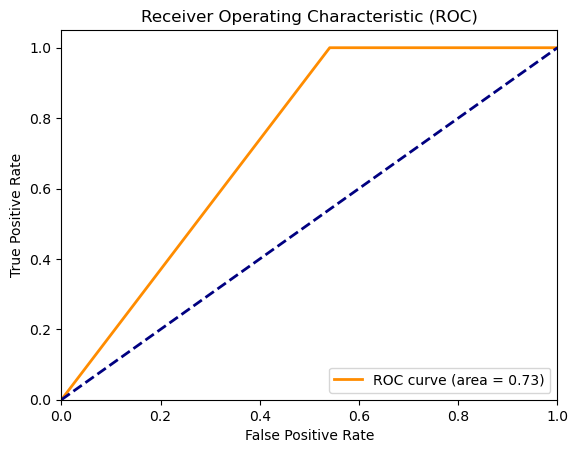

AUC: 0.73


In [92]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_prob = rf_classifier.predict_proba(X_scaled_test2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test2, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc:.2f}")
